# FRONT RESULTATS

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

import random 

import matplotlib.pyplot as plt
from matplotlib import colors
import mplcursors
import matplotlib.colors as mcolors

In [2]:
# DATABES SQLITE
import sqlite3
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table, update, select
db_path = '../DATA/HistoPlotik.db'

In [3]:
# Connect to the SQLite database (replace 'your_database.db' with your actual database file)
connection = sqlite3.connect(db_path)

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", connection)
for table in tables['name']:
    print (table)

# Close the database connection
connection.close()

XGBoost_reg200_resultats_tbl
XGBoost_reg200_importance_tbl
y_resultats200_tbl
X_col_titr
data_tbl
LGB_reg200_importance_tbl
LGB_reg200_resultats_tbl
villes_tbl
RandomF_reg200_resultats_tbl


In [4]:
# Connect to the SQLite database (replace 'your_database.db' with your actual database file)
connection = sqlite3.connect(db_path)

# Specify the table name you want to read
tbl_data = 'data_tbl'

# Read the specified table into a DataFrame
query = f"SELECT * FROM {tbl_data}"
df = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

df.shape

(33803, 273)

In [5]:
moy=[0.26780330618314363,
 0.026840317879397668,
 0.2613130117529952,
 0.12340510077085327,
 0.23044994449024447,
 0.062083856325418664,
 0.028104462597947067]

In [6]:
key = '89069' # CHAILLEY score pas mal
# key = '78575' # ST REMY sore presque nul
# key = '38185' # GRENOBLE score negatis

In [7]:
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL query for the join
sql_query = f"""
SELECT 
    V.*,
    R.*,
    XGB.pred_NUP AS XGB_NUP, XGB.pred_ECO AS XGB_ENS, XGB.pred_LR_UDI AS XGB_LR_UDI,  
    XGB.pred_EXTREMD AS XGB_EXTREMD,  XGB.pred_CENTRE as XGB_CENTRE, XGB.pred_OTR AS XGB_OTR,
    LGB.pred_NUP AS LGB_NUP, LGB.pred_ECO AS LGB_ENS, LGB.pred_LR_UDI AS LGB_LR_UDI,  
    LGB.pred_EXTREMD AS LGB_EXTREMD,  LGB.pred_CENTRE as LGB_CENTRE, LGB.pred_OTR AS LGB_OTR,
    RF.pred_NUP AS RF_NUP, RF.pred_ECO AS RF_ENS, RF.pred_LR_UDI AS RF_LR_UDI,  
    RF.pred_EXTREMD AS RF_EXTREMD,  RF.pred_CENTRE as RF_CENTRE, RF.pred_OTR AS RF_OTR,
    {moy[0]} AS moy_NUP,
    {moy[1]} AS moy_ECO,
    {moy[2]} AS moy_ENS,
    {moy[3]} AS moy_LR_UDI,
    {moy[4]} AS moy_EXTREMD,
    {moy[5]} AS moy_CENTRE,
    {moy[6]} AS moy_OTR,
    D.*
FROM 
    villes_tbl V,
    y_resultats200_tbl R,
    XGBoost_reg200_resultats_tbl XGB,
    LGB_reg200_resultats_tbl LGB,
    RandomF_reg200_resultats_tbl RF,
    data_tbl D
WHERE 
    V.key = {key}
    AND R.key = V.key
    AND XGB.key = V.key
    AND LGB.key = V.key
    AND RF.key = V.key
    AND D.key = V.key
LIMIT 100;
"""

# Execute the SQL query and fetch the result into a DataFrame
test_df = pd.read_sql_query(sql_query, connection)

# Display the result DataFrame
test_df.head(25)

,key,codepostale,nomcommune,nomdep,nomregion,latitude,longitude,altitude,superficie,codedepartement,...,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92,dep,nomdep,codecommune,nomcommune
0,89069,89770,CHAILLEY,YONNE,BOURGOGNE,48.090402,3.686199,222.0,1696.0,89,...,0.015209,0.037567,0.050089,0.012522,0.055,0.095745,89,YONNE,89069,CHAILLEY


In [8]:
scorelist = ['NUP','ENS','LR_UDI','EXTREMD','CENTRE','OTR']
scorelist_XGB = ['XGB_NUP','XGB_ENS','XGB_LR_UDI','XGB_EXTREMD','XGB_CENTRE','XGB_OTR']
scorelist_LGB = ['LGB_NUP','LGB_ENS','LGB_LR_UDI','LGB_EXTREMD','LGB_CENTRE','LGB_OTR']
scorelist_RF = ['RF_NUP','RF_ENS','RF_LR_UDI','RF_EXTREMD','RF_CENTRE','RF_OTR']
scorelist_moy = ['moy_NUP','moy_ENS','moy_LR_UDI','moy_EXTREMD','moy_CENTRE','moy_OTR']

In [12]:
values1 = test_df[scorelist]  
values2 = test_df[scorelist_RF] 
values3 = test_df[scorelist_moy] 

values1.values

array([[0.10810811, 0.22972973, 0.        , 0.56081079, 0.04054054,
        0.00675676]])

In [13]:
values1 = test_df[scorelist].values[0]
values2 = test_df[scorelist_RF].values[0] 
values3 = test_df[scorelist_moy].values[0]

from sklearn.metrics import mean_squared_error

# Assuming values1, values2, and values3 are already defined

# Calculate MSE between values1 and values2
mse_values1_values2 = mean_squared_error(values1, values2)
print(f'MSE between values1 and values2: {mse_values1_values2}')

# Calculate MSE between values1 and values3
mse_values1_values3 = mean_squared_error(values1, values3)
print(f'MSE between values1 and values3: {mse_values1_values3}') 

perf = mse_values1_values3/mse_values1_values2
perf

MSE between values1 and values2: 0.009609367737719605
MSE between values1 and values3: 0.025297834151945822


2.6326221289923537

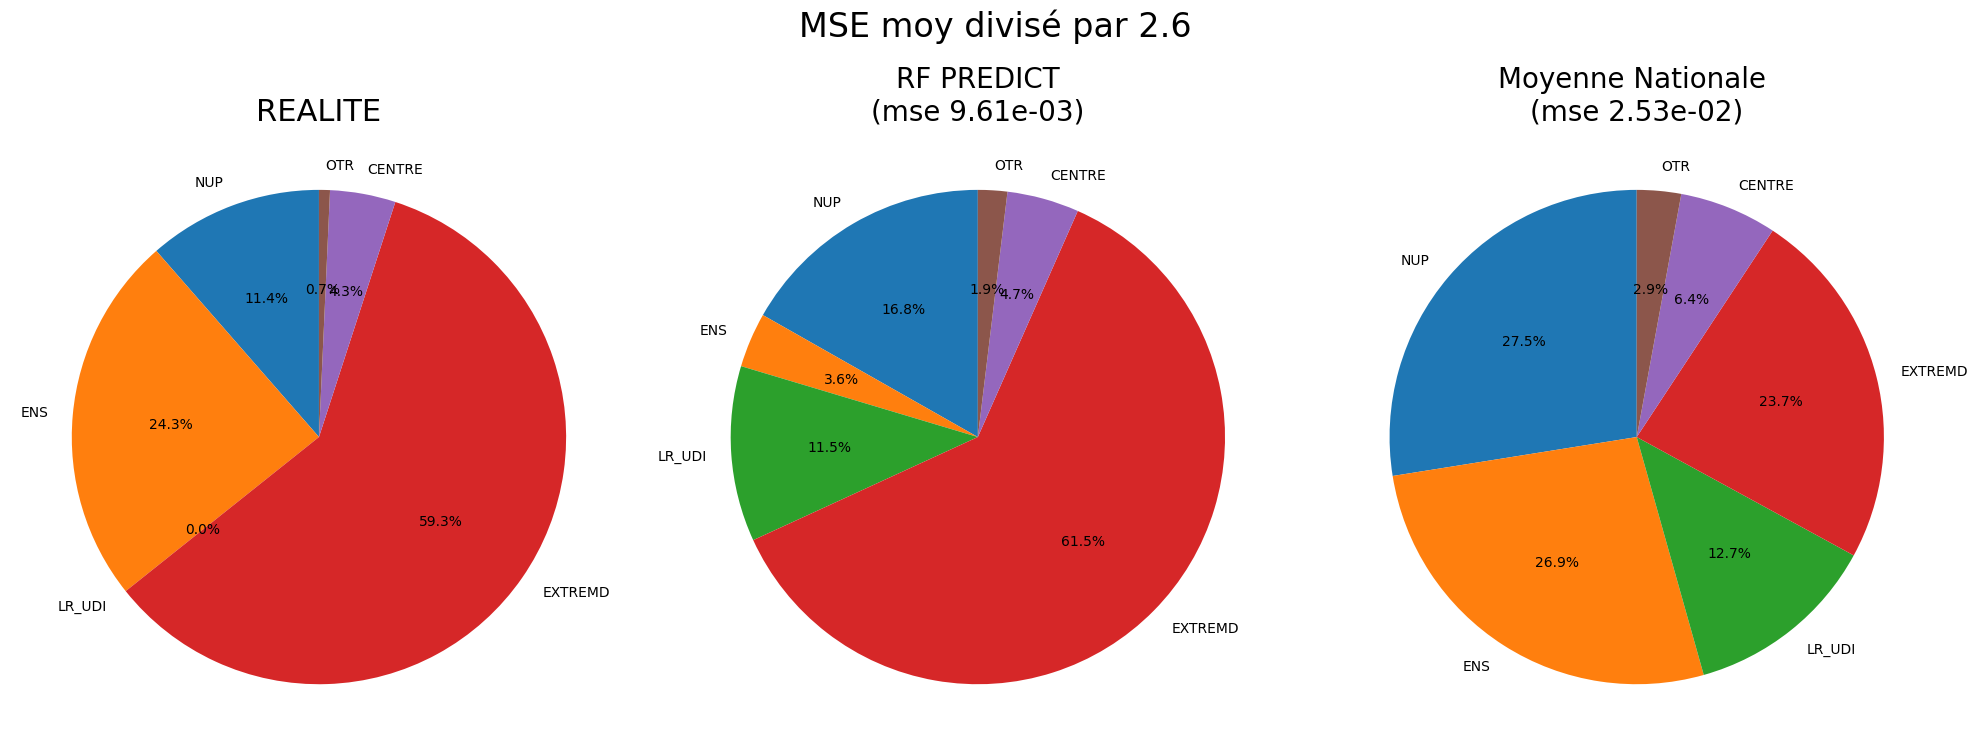

In [14]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first pie chart
axs[0].pie(values1, labels=scorelist , autopct='%1.1f%%', startangle=90)
axs[0].set_title('REALITE' ,fontsize=22)

# Plot the second pie chart
axs[1].pie(values2, labels=scorelist, autopct='%1.1f%%', startangle=90)
axs[1].set_title(f'RF PREDICT\n(mse {mse_values1_values2:.2e})', fontsize=20)

# Plot the second pie chart
axs[2].pie(values3, labels=scorelist, autopct='%1.1f%%', startangle=90)
axs[2].set_title(f'Moyenne Nationale \n(mse {mse_values1_values3:.2e})', fontsize=20)

# Global title
plt.suptitle(f'MSE moy divisé par {perf:.1f}\n', fontsize=24)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()   

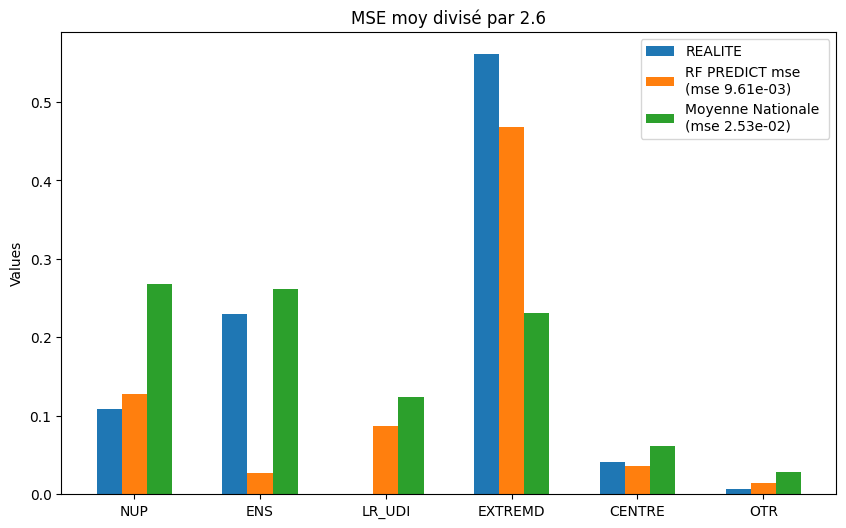

In [15]:
# Combine all values for each index
all_values = np.vstack([values1, values2, values3])

# Create a figure for the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
models = ['REALITE', f'RF PREDICT mse \n(mse {mse_values1_values2:.2e})', f'Moyenne Nationale \n(mse {mse_values1_values3:.2e})']  # You can adjust model names
bar_width = 0.2

for i, model in enumerate(models):
    ax.bar([j + i * bar_width for j in range(len(all_values[0]))], all_values[i], width=bar_width, label=model)

# Add a line for the mean value
# ax.axhline(y=np.mean(all_values), color='black', linestyle='--', label='Mean Value')

ax.set_xticks([j + bar_width * (len(models) - 1) / 2 for j in range(len(scorelist))])
ax.set_xticklabels(scorelist)
ax.set_ylabel('Values')
ax.set_title(f'MSE moy divisé par {perf:.1f}')

# Show legend
ax.legend()

In [16]:
first3char ='   '
for i,c in enumerate(test_df) : 
    if c[0:3] != first3char :
        first3char = c[0:3]
        print ('\n', i , c, end='  ')
    else : 
        print (c, end='  ')


 0 key  
 1 codepostale  
 2 nomcommune  nomdep  nomregion  
 5 latitude  
 6 longitude  
 7 altitude  
 8 superficie  
 9 codedepartement  coderegion  
 11 key  
 12 NUP  
 13 ECO  
 14 ENS  
 15 LR_UDI  
 16 EXTREMD  
 17 CENTRE  
 18 OTR  
 19 XGB_NUP  XGB_ENS  XGB_LR_UDI  XGB_EXTREMD  XGB_CENTRE  XGB_OTR  
 25 LGB_NUP  LGB_ENS  LGB_LR_UDI  LGB_EXTREMD  LGB_CENTRE  LGB_OTR  
 31 RF_NUP  RF_ENS  RF_LR_UDI  RF_EXTREMD  RF_CENTRE  RF_OTR  
 37 moy_NUP  moy_ECO  moy_ENS  moy_LR_UDI  moy_EXTREMD  moy_CENTRE  moy_OTR  
 44 key  
 45 TAR_inscrits  TAR_votants  TAR_exprimes  
 48 YYY_pvoixNUP  YYY_pvoixECO  YYY_pvoixENS  
 51 TAR_electeurs  
 52 YYY_pvoixLR_UDI  YYY_pvoixEXTREMD  YYY_pvoixCENTRE  YYY_pvoixOTR  
 56 RSA_nrsa2017  RSA_nrsa2021  RSA_prsa2017  RSA_prsa2021  
 60 AGE_pop_22  AGE_propf_22  AGE_popf014_22  AGE_popf1539_22  AGE_popf4059_22  AGE_popf60p_22  AGE_poph014_22  AGE_poph1539_22  AGE_poph4059_22  AGE_poph60p_22  AGE_prop014_22  AGE_prop1539_22  AGE_prop4059_22  AGE_prop60

In [17]:
test_df.shape

(1, 317)

In [ ]:
key 
    dep / nomdep / codecommune / nomcommune / GEO_latitude / GEO_longitude / 
    TAR_inscrits / TAR_votants / TAR_exprimes / TAR_electeurs /
    YYY_pvoixNUP / YYY_pvoixECO / YYY_pvoixENS / YYY_pvoixLR_UDI / YYY_pvoixEXTREMD / YYY_pvoixCENTRE / YYY_pvoixOTR / 
    RSA_nrsa2017 / RSA_nrsa2021 / RSA_prsa2017 / RSA_prsa2021 / 
AGE :
    AGE_pop_22 / AGE_propf_22 / AGE_popf014_22 / AGE_popf1539_22 / AGE_popf4059_22 / AGE_popf60p_22 / AGE_poph014_22 / AGE_poph1539_22 / AGE_poph4059_22 / AGE_poph60p_22 / AGE_prop014_22 / AGE_prop1539_22 / AGE_prop4059_22 / AGE_prop60p_22 / AGE_propf014_22 / AGE_propf1539_22 / AGE_propf4059_22 / AGE_propf60p_22 / AGE_age_22 / AGE_agef_22 / AGE_ageh_22 / 
    AGE_pop_12 / AGE_propf_12 / AGE_popf014_12 / AGE_popf1539_12 / AGE_popf4059_12 / AGE_popf60p_12 / AGE_poph014_12 / AGE_poph1539_12 / AGE_poph4059_12 / AGE_poph60p_12 / AGE_prop014_12 / AGE_prop1539_12 / AGE_prop4059_12 / AGE_prop60p_12 / AGE_propf014_12 / AGE_propf1539_12 / AGE_propf4059_12 / AGE_propf60p_12 / AGE_age_12 / AGE_agef_12 / AGE_ageh_12 / 
    AGE_pop_02 / AGE_propf_02 / AGE_popf014_02 / AGE_popf1539_02 / AGE_popf4059_02 / AGE_popf60p_02 / AGE_poph014_02 / AGE_poph1539_02 / AGE_poph4059_02 / AGE_poph60p_02 / AGE_prop014_02 / AGE_prop1539_02 / AGE_prop4059_02 / AGE_prop60p_02 / AGE_propf014_02 / AGE_propf1539_02 / AGE_propf4059_02 / AGE_propf60p_02 / AGE_age_02 / AGE_agef_02 / AGE_ageh_02 / 
    AGE_pop_92 / AGE_propf_92 / AGE_popf014_92 / AGE_popf1539_92 / AGE_popf4059_92 / AGE_popf60p_92 / AGE_poph014_92 / AGE_poph1539_92 / AGE_poph4059_92 / AGE_poph60p_92 / AGE_prop014_92 / AGE_prop1539_92 / AGE_prop4059_92 / AGE_prop60p_92 / AGE_propf014_92 / AGE_propf1539_92 / AGE_propf4059_92 / AGE_propf60p_92 / AGE_age_92 / AGE_agef_92 / AGE_ageh_92 / 

BFL : 
    BFL_baseimpotslocauxratio20 / BFL_recetteimpotslocauxratio20 / BFL_tauximpotslocauxratio20 / BFL_baseimpotslocauxtot20 / BFL_recetteimpotslocauxtot20 / BFL_tauximpotslocaux20 / BFL_recettetot20 / BFL_baseimpotslocaux20 / BFL_recetteimpotslocaux20 / BFL_recettefoncieretot20 / BFL_recettehabitationtot20 / BFL_recettefonciere20 / BFL_recettehabitation20 / BFL_recettefonciereratio20 / BFL_recettehabitationratio20 / BFL_basehabitationratio20 / BFL_basefonciereratio20 / BFL_tauxhabitationratio20 / BFL_tauxfoncierratio20 / BFL_basehabitationtot20 / BFL_basefoncieretot20 / BFL_tauxhabitation20 / BFL_tauxfoncier20 / BFL_basehabitation20 / BFL_basefonciere20 / BFL_recetteratio20 / 

    PIB_pibratio1992 / PIB_pibratio2002 / PIB_pibratio2012 / PIB_pibratio2022 / PIB_pibtot1992 / PIB_pibtot2002 / PIB_pibtot2012 / PIB_pibtot2022 / 

    KP0_Pri_P1 / KP0_Surf_P1 / KP0_SurfTer_P1 / KP0_transac_P1 / KP0_prim2_P1 / KP0_Pri_P2 / KP0_Surf_P2 / KP0_SurfTer_P2 / KP0_transac_P2 / KP0_prim2_P2 / 

    REV_revmoyfoy1992 / REV_revmoyfoy2002 / REV_revmoyfoy2012 / REV_revmoyfoy2022 / 
    
    KP1_capitalimmo22 / KP1_prixbien22 / KP1_capitalimmo12 / KP1_prixbien12 / KP1_capitalimmo02 / KP1_prixbien02 / KP1_capitalimmo92 / KP1_prixbien92 / 
    
    PO0_electeurs1992 / PO0_electeurs2002 / PO0_electeurs2012 / PO0_electeurs2022 / 

    PRO_ppropri22 / PRO_nlogement22 / PRO_ppropri12 / PRO_nlogement12 / PRO_ppropri02 / PRO_nlogement02 / PRO_ppropri92 / PRO_nlogement92 / 

    EMP_emp2006 / EMP_adm2006 / EMP_agr2006 / EMP_cre2006 / EMP_loi2006 / EMP_dis2006 / EMP_edu2006 / EMP_fab2006 / EMP_bag2006 / EMP_tra2006 / EMP_san2006 / EMP_res2006 / 
    EMP_emp2016 / EMP_adm2016 / EMP_agr2016 / EMP_cre2016 / EMP_loi2016 / EMP_dis2016 / EMP_edu2016 / EMP_fab2016 / EMP_bag2016 / EMP_tra2016 / EMP_san2016 / EMP_res2016 / 
    EMP_btp_cie2006 / EMP_btp_cie2016 / EMP_rep_con2016 / EMP_rep_con2006 / 

DIP :
    DIP_bach1992 / DIP_bach2002 / DIP_bach2012 / DIP_bach2017 / DIP_bach2022 / 
    DIP_suph1992 / DIP_suph2002 / DIP_suph2012 / DIP_suph2017 / DIP_suph2022 / 
    DIP_bacf1992 / DIP_bacf2002 / DIP_bacf2012 / DIP_bacf2017 / DIP_bacf2022 / 
    DIP_supf1992 / DIP_supf2002 / DIP_supf2012 / DIP_supf2017 / DIP_supf2022 / 
    
CED : 
    CED_nviolences2016 / CED_nviolences2020 / CED_ncambriolages2016 / CED_ncambriolages2020 / CED_nvolsvoitures2016 / CED_nvolsvoitures2020 / CED_nautresvols2016 / CED_nautresvols2020 / CED_ncrimesdelits2016 / CED_ncrimesdelits2020 / 

CSP :    
    CSP_peragri1992 / CSP_peragri2002 / CSP_peragri2012 / CSP_peragri2022 / CSP_perindp1992 / CSP_perindp2002 / CSP_perindp2012 / CSP_perindp2022 / CSP_percadr1992 / CSP_percadr2002 / CSP_percadr2012 / CSP_percadr2022 / CSP_perpint1992 / CSP_perpint2002 / CSP_perpint2012 / CSP_perpint2022 / CSP_perempl1992 / CSP_perempl2002 / CSP_perempl2012 / CSP_perempl2022 / CSP_perouvr1992 / CSP_perouvr2002 / CSP_perouvr2012 / CSP_perouvr2022 / CSP_perchom1992 / CSP_perchom2002 / CSP_perchom2012 / CSP_perchom2022 / 

    TER_nexploit / TER_surf / TER_nexploit68 / TER_surf68 / 
    
    NAT_petranger22 / NAT_pimmigre22 / NAT_pimmnatur22 / NAT_pnatur22 / NAT_petranger12 / NAT_pimmigre12 / NAT_pimmnatur12 / NAT_petranger02 / NAT_petranger92 / 


In [8]:
def importance_graf (db_path, model_tbl, cat='NUP', size = 10) :
    connection = sqlite3.connect(db_path)

    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Define the SQL query for the join
    col_value = f"{cat}_import"
    col_indice_var = f"{cat}_estim_indice"

    # Use string formatting to insert variable values into the query
    sql_query = f"""
    SELECT 
        C.titr_col_value,
        FI.{col_value}
    FROM     
        {model_tbl} FI
        JOIN X_col_titr AS C ON C.indice = FI.{col_indice_var}
    ORDER BY 
        FI.{col_value} DESC
    LIMIT {size}
    """

    # Execute the SQL query and fetch the result into a DataFrame
    test_df = pd.read_sql_query(sql_query, connection)

    # Display the result DataFrame
    print (test_df)
        
model_tbl='XGBoost_reg200_importance_tbl'    
importance_graf (db_path, model_tbl, cat='EXTREMD')

              titr_col_value  EXTREMD_import
0            CSP_perouvr2002        0.051162
1               DIP_supf1992        0.035382
2               GEO_latitude        0.033193
3              GEO_longitude        0.029764
4            CSP_perouvr1992        0.023228
5      CED_ncambriolages2016        0.021328
6                 TER_surf68        0.020404
7               TER_nexploit        0.018492
8  BFL_basehabitationratio20        0.017233
9            CSP_percadr2012        0.016231
